In [37]:
import pandas as pd
import numpy as np

In [3]:
df_ann = pd.read_csv("avoidance_study//Annotated//Avoidance_annotated.csv")

In [26]:
df_parl = pd.read_csv("parliament_metadata.tsv", sep='\t')

In [28]:
d = {'thatcher': 'conservative', 
    'major': 'conservative',
    'blair': 'labour',
    'brown': 'labour',
    'cameron': 'conservative',
    'may': 'conservative'}

def cond_ask(s):
    if s['party_asker'] == d[s['govt']]:
        return False
    return True
    
df_parl['opposition_asker'] = df_parl.apply(cond_ask, axis=1)

def cond_ans(s):
    if s['party_answerer'] == d[s['govt']]:
        return False
    return True
    
df_parl['opposition_answerer'] = df_parl.apply(cond_ans, axis=1)

In [29]:
df_ann = df_ann[df_ann['dataset'] == "PQTC"]
df_parl = df_parl[['pair_idx', 'opposition_asker', 'opposition_answerer']]
# common_cols = ['dataset','id_a', 'id_q', 'meta.pair_idx', 'text_q', 'text_a']
df = pd.merge(df_ann, df_parl, how='left', left_on='meta.pair_idx', right_on='pair_idx')

In [60]:
df = df[(df['if_q_1'] == 'Q') & (df['if_q_2'] == 'Q') & (df['if_q_3'] == 'Q')]

In [61]:
df_og = df[(df['opposition_asker'] == True) & (df['opposition_answerer'] == False)]
df_gg = df[(df['opposition_asker'] == False) & (df['opposition_answerer'] == False)]
df_oo = df[(df['opposition_asker'] == True) & (df['opposition_answerer'] == True)]
df_go = df[(df['opposition_asker'] == False) & (df['opposition_answerer'] == True)]

print('Q opp, A gov: ', df_og.shape, 
      '\nQ gov, A gov: ', df_gg.shape, 
      '\nQ opp, A opp: ', df_oo.shape, 
      '\nQ gov, A opp: ', df_go.shape)

Q opp, A gov:  (31, 21) 
Q gov, A gov:  (36, 21) 
Q opp, A opp:  (70, 21) 
Q gov, A opp:  (2, 21)


In [69]:
# Count average rate of avoidance
print('Mean: ', df_og['avoid_rate_avg'].mean(), 
      '\nDefinite avoidance: ', df_og[df_og['avoid_rate_avg'] >= 3].shape[0],
      ' from ', df_og['avoid_rate_avg'].shape[0])
print('Mean: ', df_gg['avoid_rate_avg'].mean(), 
      '\nDefinite avoidance: ', df_gg[df_gg['avoid_rate_avg'] >= 3].shape[0],
      ' from ', df_gg['avoid_rate_avg'].shape[0])
print('Mean: ', df_oo['avoid_rate_avg'].mean(), 
      '\nDefinite avoidance: ', df_oo[df_oo['avoid_rate_avg'] >= 3].shape[0],
      ' from ', df_oo['avoid_rate_avg'].shape[0])
print('Mean: ', df_go['avoid_rate_avg'].mean(), 
      '\nDefinite avoidance: ', df_go[df_go['avoid_rate_avg'] >= 3].shape[0],
      ' from ', df_go['avoid_rate_avg'].shape[0])

Mean:  2.946236559139785 
Definite avoidance:  20  from  31
Mean:  2.453703703703704 
Definite avoidance:  14  from  36
Mean:  2.4809523809523815 
Definite avoidance:  34  from  70
Mean:  2.0 
Definite avoidance:  0  from  2


In [64]:
df_go

,index,dataset,id_a,id_q,meta.pair_idx,text_q,text_a,if_q_1,avoid_rate_1,avoid_type_1,...,avoid_rate_2,avoid_type_2,if_q_3,avoid_rate_3,avoid_type_3,avoid_rate_avg,avoid_type_avg,pair_idx,opposition_asker,opposition_answerer
107,301,PQTC,1997-07-07a.597.4,1997-07-07a.612.3,1997-07-07.15.0,I thank my hon Friend for his reply . I take t...,I should be delighted to consider those propos...,Q,4.0,Flight,...,1.0,NaN,Q,0.0,NaN,1.666667,Flight,1997-07-07.15.0,False,True
149,404,PQTC,1998-07-13a.14.4,1998-07-13a.14.1,1998-07-13.11.0,I thank my hon Friend for that reply . Does he...,I shall certainly bear in mind the points that...,Q,3.0,Fight,...,3.0,Flight,Q,1.0,NaN,2.333333,Undetermined,1998-07-13.11.0,False,True


Text(0.5, 0, 'Avoidance rate')

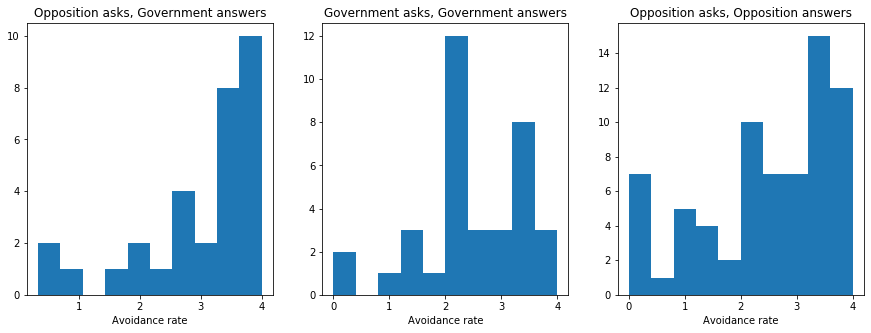

In [65]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
ax1.hist(df_og['avoid_rate_avg'])
ax1.set_title("Opposition asks, Government answers")
ax1.set_xlabel("Avoidance rate")
ax2.hist(df_gg['avoid_rate_avg'])
ax2.set_title("Government asks, Government answers")
ax2.set_xlabel("Avoidance rate")
ax3.hist(df_oo['avoid_rate_avg'])
ax3.set_title("Opposition asks, Opposition answers")
ax3.set_xlabel("Avoidance rate")